In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_csv('../data/global_unemployment.csv')
print(df.head())
print(df.info())

  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332  
1  14.415  23.818  26.192  28.298  
2  17.134  26.

In [109]:
# 1. إعداد قاموس يربط الدولة بالقارة (قم بتوسيعه حسب الحاجة)
country_to_continent = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa', 'Democratic Republic of the Congo': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa', 'Ivory Coast': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa',
    'South Sudan': 'Africa', 'Sudan': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia', 'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia', 'North Korea': 'Asia',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia', 'Russia': 'Asia',
    'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Armenia': 'Europe', 'Austria': 'Europe', 'Azerbaijan': 'Europe',
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Georgia': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe',
    'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe',
    'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Ukraine': 'Europe', 'United Kingdom': 'Europe', 'Vatican City': 'Europe',

    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America', 'Cuba': 'North America',
    'Dominica': 'North America', 'Dominican Republic': 'North America', 'El Salvador': 'North America',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Haiti': 'North America', 'Honduras': 'North America',
    'Jamaica': 'North America', 'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America', 'United States': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Ecuador': 'South America', 'Guyana': 'South America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania', 'Nauru': 'Oceania', 'New Zealand': 'Oceania', 'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania', 'Solomon Islands': 'Oceania', 'Tonga': 'Oceania',
    'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania'
}

# 2. إضافة العمود إلى DataFrame
df['continent'] = df['country_name'].map(country_to_continent)


In [111]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 country_name         0
indicator_name       0
sex                  0
age_group            0
age_categories       0
2014                 0
2015                 0
2016                 0
2017                 0
2018                 0
2019                 0
2020                 0
2021                 0
2022                 6
2023                12
2024                12
delta_2019_2021      0
continent          150
dtype: int64


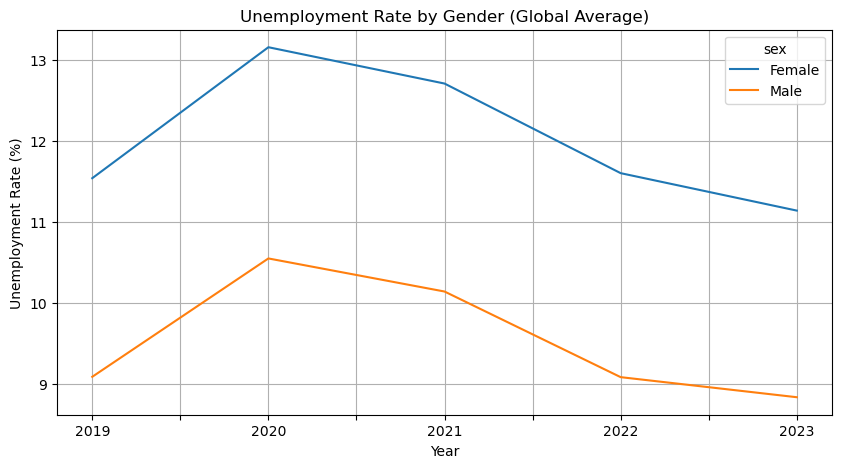

In [113]:
# The difference between males and females is analyzed
gender_avg = df.groupby('sex')[years].mean().T
gender_avg.plot(figsize=(10,5))
plt.title("Unemployment Rate by Gender (Global Average)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

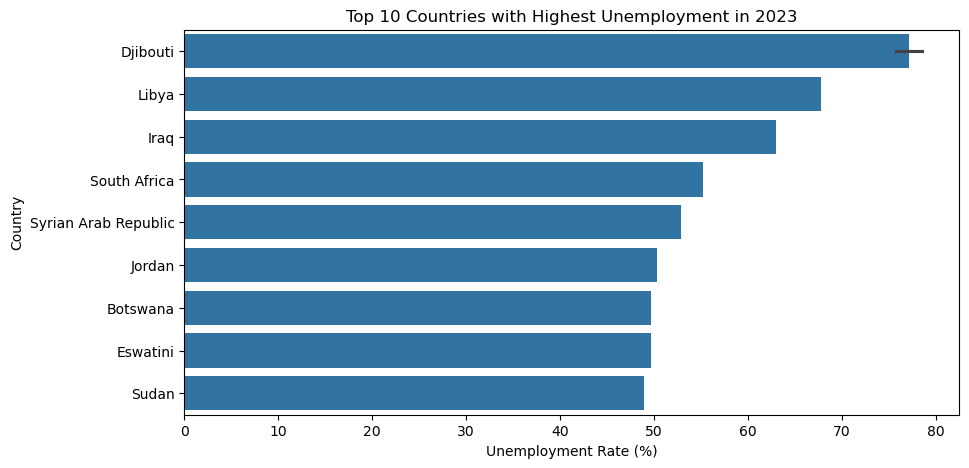

In [53]:
# The countries with the highest unemployment rates in the year 2023 are identified
top_2023 = df[['country_name', '2023']].sort_values(by='2023', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_2023, x='2023', y='country_name')
plt.title("Top 10 Countries with Highest Unemployment in 2023")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Country")
plt.show()


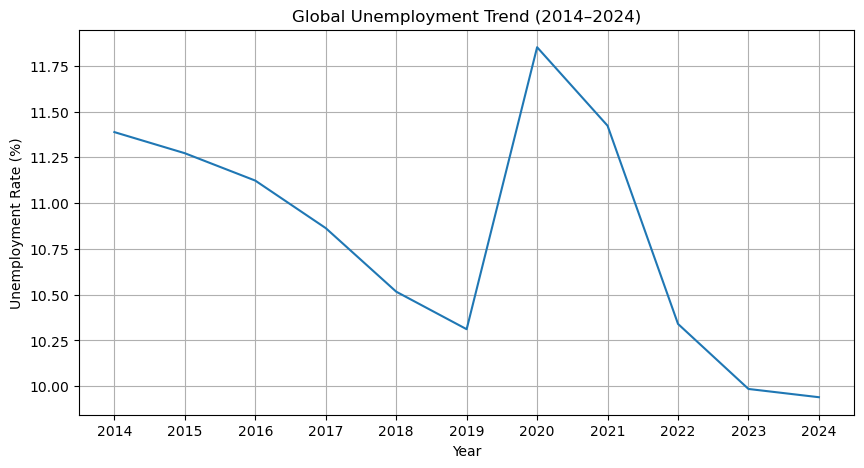

In [67]:
# The global unemployment trend over time is analyzed and visualized
years = [str(y) for y in range(2014, 2025)]
global_trend = df[years].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=years, y=global_trend)
plt.title("Global Unemployment Trend (2014–2024)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


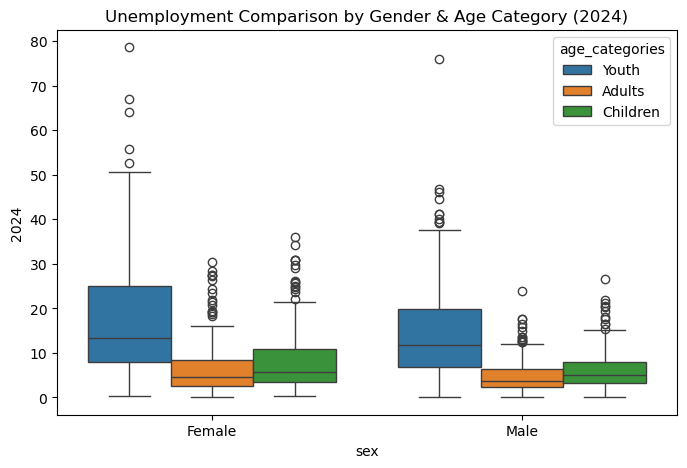

In [71]:
# The different age groups (children, youth, adults) are compared
latest = df[['sex', 'age_categories', '2024']].dropna()
plt.figure(figsize=(8,5))
sns.boxplot(data=latest, x='sex', y='2024', hue='age_categories')
plt.title("Unemployment Comparison by Gender & Age Category (2024)")
plt.show()


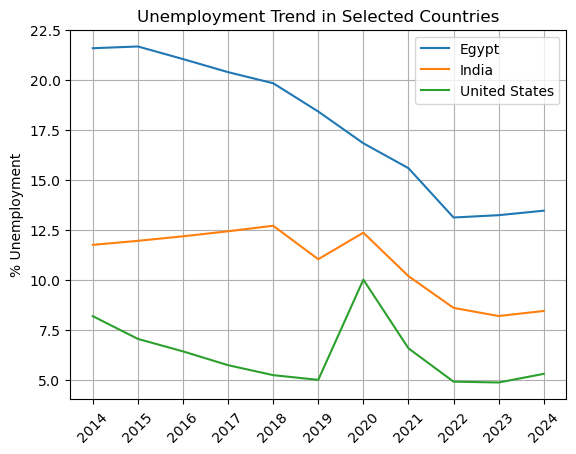

In [75]:
# Changes in unemployment rates over time are tracked for specific countries (e.g., Egypt, India, United States)
selected_countries = ['Egypt', 'India', 'United States']
for country in selected_countries:
    trend = df[df['country_name'] == country][years].mean()
    plt.plot(years, trend, label=country)

plt.title("Unemployment Trend in Selected Countries")
plt.ylabel("% Unemployment")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


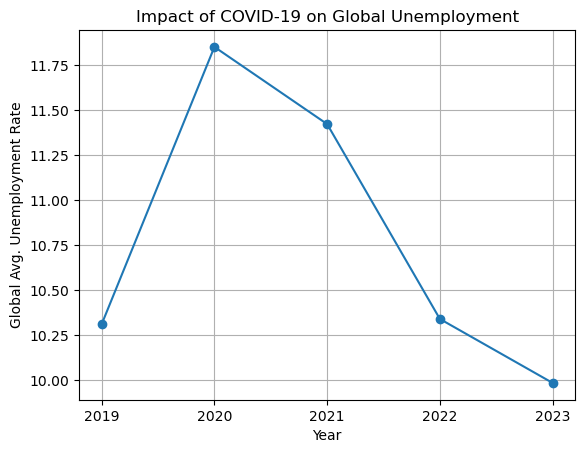

In [93]:
# The global unemployment rates before and after the COVID-19 pandemic are compared
years = ['2019', '2020', '2021', '2022', '2023']
global_avg = df[years].mean()

plt.plot(years, global_avg, marker='o')
plt.title("Impact of COVID-19 on Global Unemployment")
plt.ylabel("Global Avg. Unemployment Rate")
plt.xlabel("Year")
plt.grid(True)
plt.show()


In [189]:
#The countries that succeeded in reducing unemployment (top improvers) were analyzed.
df['delta_2014_2024'] = df['2024'] - df['2014']
improvers = df.groupby('country_name')['delta_2014_2024'].mean().sort_values()
print(f"\nThe countries that succeeded in reducing unemployment (top improvers) were analyzed.:")

print(improvers.head(20))  


The countries that succeeded in reducing unemployment (top improvers) were analyzed.:
country_name
Bosnia and Herzegovina   -21.190167
Greece                   -21.084833
North Macedonia          -19.211000
Serbia                   -17.562667
Spain                    -16.048500
Croatia                  -15.548667
Cyprus                   -12.380833
Puerto Rico              -10.260833
Portugal                 -10.115167
Bulgaria                  -9.542500
Italy                     -9.056000
Saudi Arabia              -9.027667
Poland                    -8.437833
Ireland                   -8.281833
Slovenia                  -8.251500
Egypt                     -8.128333
Albania                   -8.078500
Slovakia                  -6.657333
Saint Lucia               -5.944667
Barbados                  -5.913000
Name: delta_2014_2024, dtype: float64


In [195]:
#Countries that recorded significant increases in unemployment were identified.

worseners = df.groupby('country_name')['delta_2014_2024'].mean().sort_values(ascending=False)
print(f"\nCountries that recorded significant increases in unemployment were identified.:")
print(worseners.head(20))  


Countries that recorded significant increases in unemployment were identified.:
country_name
Afghanistan     14.251333
Iraq             8.853500
Bhutan           8.752333
Jordan           7.757667
South Africa     6.489167
Botswana         6.217333
Pakistan         5.025000
Zimbabwe         4.969167
Yemen            4.682500
Algeria          4.436833
Sri Lanka        4.384500
Panama           4.251667
Sudan            4.007000
Myanmar          3.822000
Tunisia          3.771000
Chile            3.585333
Rwanda           3.573833
Kenya            3.407167
Uruguay          3.294667
Mauritania       2.906833
Name: delta_2014_2024, dtype: float64


In [209]:
df['std_dev'] = df[[str(y) for y in range(2014, 2025)]].std(axis=1)
stable_countries = df.groupby('country_name')['std_dev'].mean().sort_values()
print(stable_countries.head(20))  # أقل تقلبًا


country_name
Niger                                     0.106724
Qatar                                     0.201380
Benin                                     0.218305
Korea, Democratic People's Republic of    0.219126
Cambodia                                  0.234311
Chad                                      0.239732
Cameroon                                  0.242603
Taiwan, China                             0.243201
Papua New Guinea                          0.245013
Guinea-Bissau                             0.249127
Tanzania, United Republic of              0.266309
Madagascar                                0.275571
Eritrea                                   0.282615
Kazakhstan                                0.291792
Malawi                                    0.318720
Mozambique                                0.323377
Central African Republic                  0.328979
Burundi                                   0.338058
Burkina Faso                              0.355526
Turkmenistan      

In [145]:
# The 10 countries with the largest decreases in unemployment between 2019 and 2023 were identified.

df['change_2019_2023'] = df['2023'] - df['2019']
improved_countries = df.sort_values('change_2019_2023').head(10)
print(improved_countries[['country_name', '2019', '2023', 'change_2019_2023']])


        country_name    2019    2023  change_2019_2023
870     Saudi Arabia  51.002  27.319           -23.683
294            Egypt  52.014  36.599           -15.415
882           Serbia  29.907  17.950           -11.957
126           Brazil  31.846  20.607           -11.239
393           Greece  32.581  21.858           -10.723
24         Argentina  28.522  20.063            -8.459
234       Costa Rica  36.008  27.583            -8.425
747  North Macedonia  33.357  24.987            -8.370
296            Egypt  21.343  13.434            -7.909
648        Mauritius  28.615  20.714            -7.901


In [211]:
#Countries where unemployment sharply increased after the pandemic were identified.

worsened_countries = df.sort_values('change_2019_2023', ascending=False).head(20)
print(worsened_countries[['country_name', '2019', '2023', 'change_2019_2023']])


    country_name    2019    2023  change_2019_2023
102       Bhutan  13.387  32.987            19.600
105       Bhutan   9.813  25.725            15.912
120     Botswana  34.908  49.696            14.788
2    Afghanistan  15.418  29.193            13.775
1    Afghanistan  12.587  26.192            13.605
0    Afghanistan  20.154  32.200            12.046
693      Myanmar   1.266  10.175             8.909
690      Myanmar   1.398   9.221             7.823
321      Estonia  10.440  18.083             7.643
948    Sri Lanka  27.350  34.980             7.630
903     Slovakia  14.050  20.345             6.295
840       Rwanda  16.676  22.963             6.287
828      Romania  17.534  23.669             6.135
951    Sri Lanka  16.617  22.459             5.842
207        China  11.567  17.353             5.786
594   Luxembourg  16.016  21.649             5.633
957        Sudan  28.311  33.920             5.609
843       Rwanda  15.409  20.890             5.481
513       Jordan  34.525  39.66

In [213]:
# The countries with the highest unemployment rates for each year were identified.
for year in years:
    top = df[['country_name', year]].sort_values(by=year, ascending=False).head(10)
    print(f"\nTop 10 countries in unemployment for {year}:")
    print(top)



Top 10 countries in unemployment for 2020:
                country_name    2020
276                 Djibouti  83.990
279                 Djibouti  80.463
582                    Libya  73.061
756  Palestinian Territories  69.503
474                     Iraq  65.090
978     Syrian Arab Republic  58.048
324                 Eswatini  56.030
510                   Jordan  53.017
12                   Algeria  52.886
327                 Eswatini  50.607

Top 10 countries in unemployment for 2021:
                country_name    2021
276                 Djibouti  82.135
279                 Djibouti  78.706
582                    Libya  70.865
756  Palestinian Territories  64.249
474                     Iraq  62.128
978     Syrian Arab Republic  55.533
924             South Africa  54.883
510                   Jordan  53.977
324                 Eswatini  53.667
120                 Botswana  50.666

Top 10 countries in unemployment for 2022:
                country_name    2022
276              

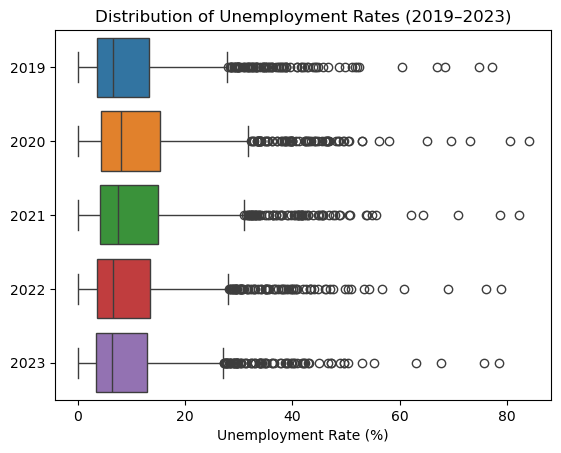

In [157]:
# The global distribution of unemployment in a specific year was visualized using a boxplot.

sns.boxplot(data=df[years], orient='h')
plt.title('Distribution of Unemployment Rates (2019–2023)')
plt.xlabel('Unemployment Rate (%)')
plt.show()

In [215]:
# Countries that maintained relative stability (low standard deviation) were identified.
df['std_dev'] = df[years].std(axis=1)
stable = df[df['std_dev'] < 1].sort_values('std_dev')
print(stable[['country_name', 'std_dev']].head(10))


    country_name   std_dev
826        Qatar  0.004655
827        Qatar  0.005508
387        Ghana  0.040377
823        Qatar  0.044836
251         Cuba  0.055729
824        Qatar  0.056240
389        Ghana  0.057102
250         Cuba  0.062059
505        Japan  0.065936
374      Georgia  0.066066


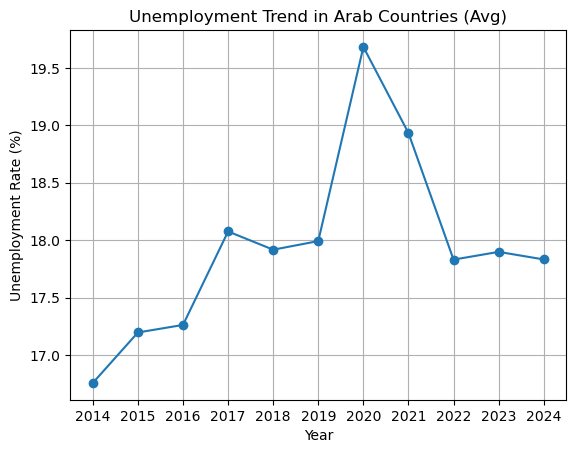

In [167]:
# Arab countries are filtered and analyzed separately from the global dataset
arab_countries = ['Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan', 'Kuwait',
                  'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine', 'Qatar',
                  'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']
arab_df = df[df['country_name'].isin(arab_countries)]

arab_avg = arab_df[[str(y) for y in range(2014, 2025)]].mean()

plt.plot(arab_avg.index, arab_avg.values, marker='o')
plt.title("Unemployment Trend in Arab Countries (Avg)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


sex               Female       Male
continent                          
Africa         13.862800  10.453513
Asia           10.782204   7.208130
Europe          9.448906   9.470350
North America  11.233246   9.062614
Oceania         7.032583   4.828583
South America  11.642788   8.195303


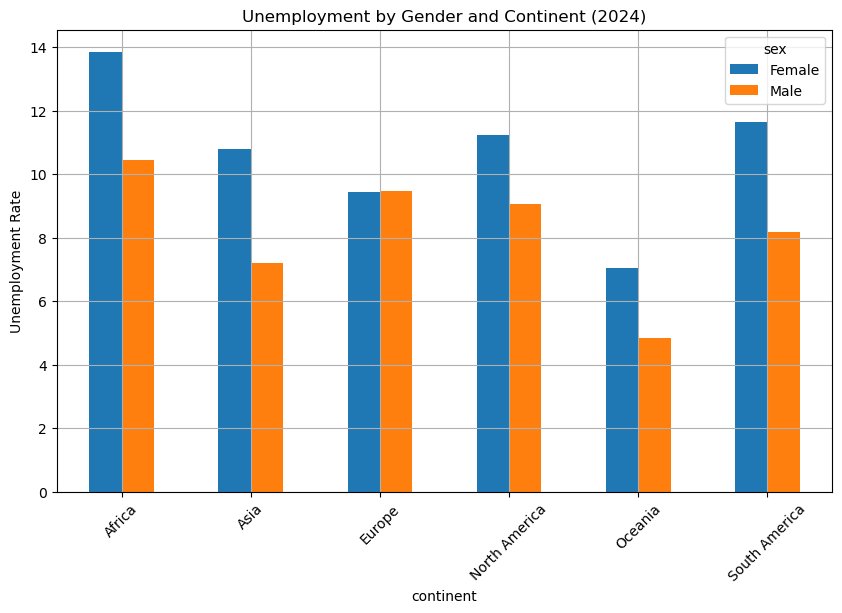

In [205]:
#Gender differences were analyzed by continent.
gender_continent = df.groupby(['continent', 'sex'])['2024'].mean().unstack()
print(gender_continent)
gender_continent.plot(kind='bar', figsize=(10,6), title='Unemployment by Gender and Continent (2024)')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


age_categories    Adults  Children      Youth
continent                                    
Africa          7.943300  9.697760  18.833410
Asia            5.147000  6.617194  15.221306
Europe          5.596603  6.502795  16.279487
North America   5.388921  7.204447  17.850421
Oceania         2.898000  4.331125  10.562625
South America   5.267318  7.022318  17.467500


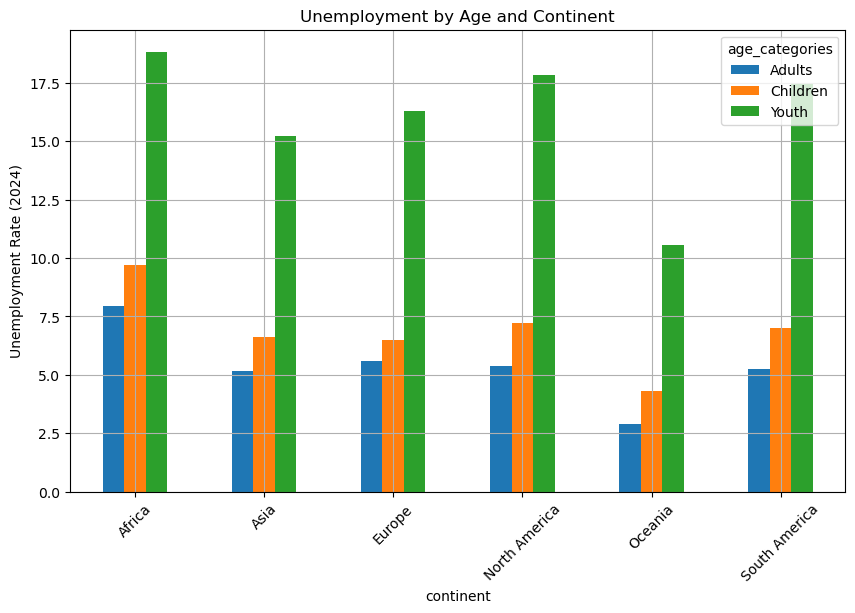

In [201]:
#Age groups were compared across continents.
age_continent = df.groupby(['continent', 'age_categories'])['2024'].mean().unstack()
print(age_continent)
age_continent.plot(kind='bar', figsize=(10,6), title='Unemployment by Age and Continent')
plt.ylabel('Unemployment Rate (2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

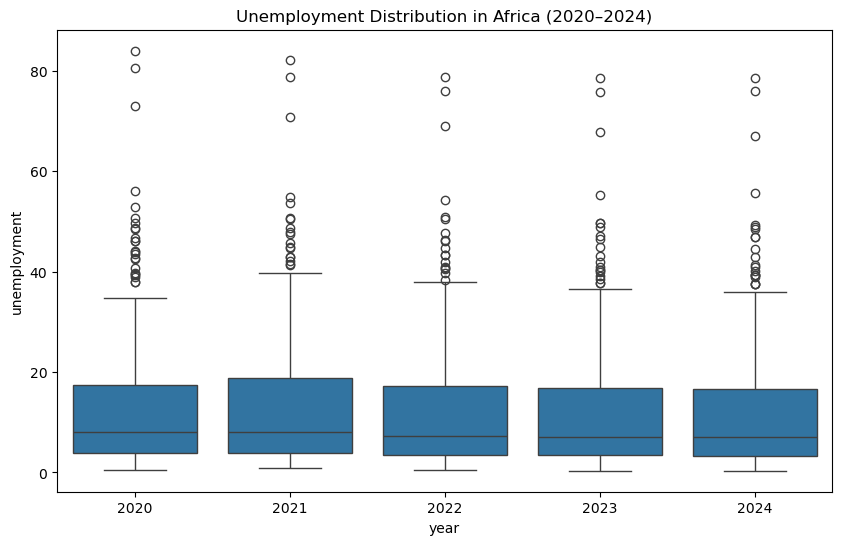

In [165]:
africa_df = df[df['continent'] == 'Africa']

melted = africa_df.melt(id_vars=['country_name'], value_vars=[str(y) for y in range(2020,2025)],
                        var_name='year', value_name='unemployment')

plt.figure(figsize=(10,6))
sns.boxplot(data=melted, x='year', y='unemployment')
plt.title("Unemployment Distribution in Africa (2020–2024)")
plt.show()


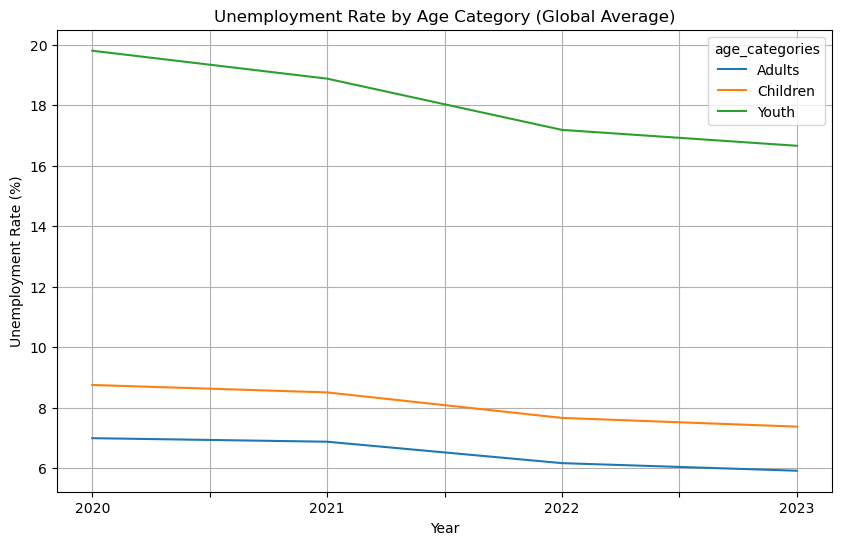

In [171]:
# The average global unemployment rate for each age group is calculated over the years
age_trends = df.groupby('age_categories')[years].mean().T
age_trends.plot(figsize=(10,6))
plt.title("Unemployment Rate by Age Category (Global Average)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


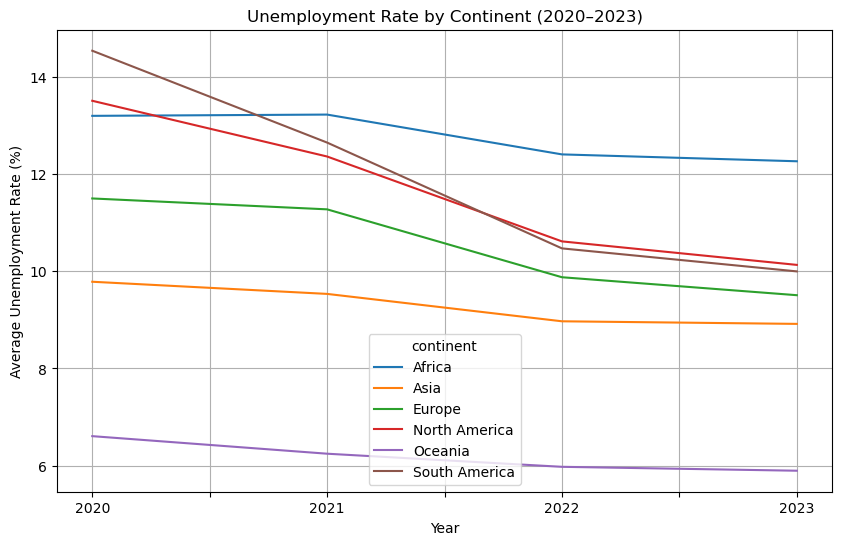

In [219]:
# Unemployment rates are compared across different continents
years = [str(y) for y in range(2020, 2024)]
continent_avg = df.groupby('continent')[years].mean().T

continent_avg.plot(figsize=(10,6))
plt.title("Unemployment Rate by Continent (2020–2023)")
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()


In [231]:
# A detailed analysis of the prediction was conducted.
# An attempt was made to use LinearRegression, but a mismatch in data lengths was encountered.

cols = ['2020', '2021', '2022', '2023', '2024']
data = df.dropna(subset=cols).copy()  

X = data[['2020', '2021', '2022', '2023']]
y = data['2024']

model = LinearRegression()
model.fit(X, y)

# A safe prediction for the year 2025 was performed.
data.loc[:, '2025_pred'] = model.predict(X)


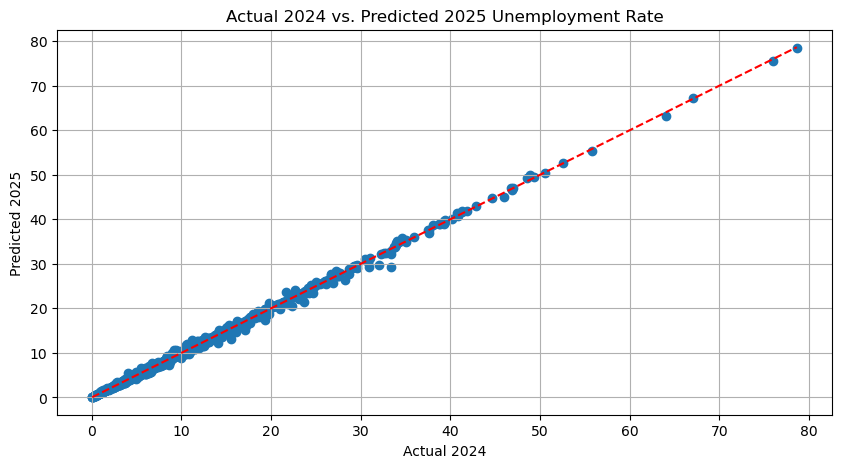

In [235]:
# The differences between predicted and actual values were plotted.
plt.figure(figsize=(10,5))
plt.scatter(y, data['2025_pred'])
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 
plt.xlabel('Actual 2024')
plt.ylabel('Predicted 2025')
plt.title('Actual 2024 vs. Predicted 2025 Unemployment Rate')
plt.grid(True)
plt.show()


                         country_name  2025_pred
276                          Djibouti  78.421409
279                          Djibouti  75.576690
582                             Libya  67.350914
474                              Iraq  63.305376
924                      South Africa  55.292104
978              Syrian Arab Republic  52.740922
510                            Jordan  50.397105
954                             Sudan  49.848868
324                          Eswatini  49.475333
120                          Botswana  49.289815
426                             Haiti  47.087481
12                            Algeria  47.054067
927                      South Africa  46.472492
849                       Saint Lucia  44.906963
327                          Eswatini  44.748594
360                             Gabon  42.911133
855  Saint Vincent and the Grenadines  41.970456
354                  French Polynesia  41.936769
225                             Congo  41.748384
852  Saint Vincent a

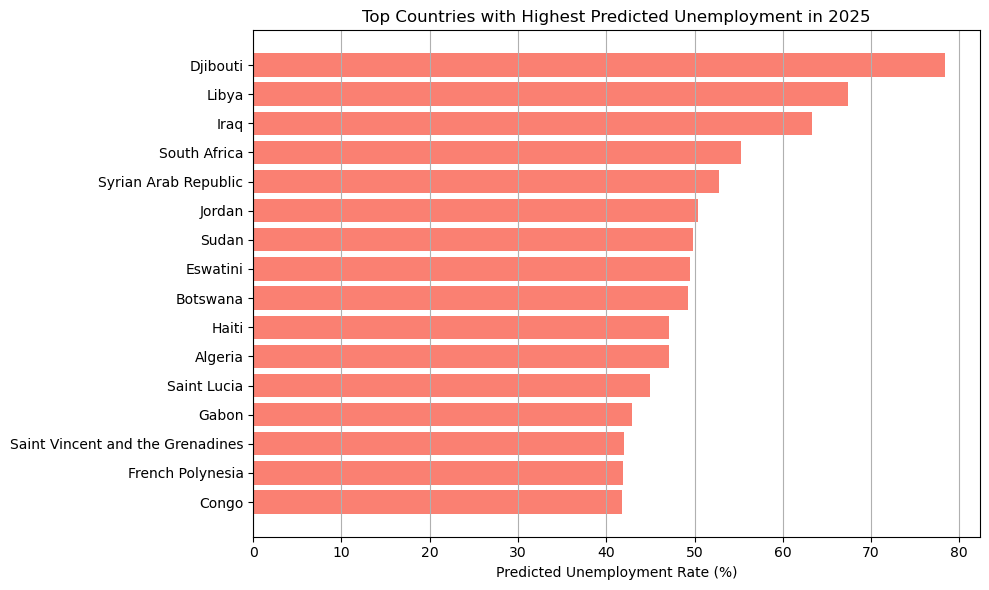

In [263]:
top_predicted = data[['country_name', '2025_pred']].sort_values(by='2025_pred', ascending=False).head(20)
print(top_predicted)


plt.figure(figsize=(10, 6))
plt.barh(top_predicted['country_name'], top_predicted['2025_pred'], color='salmon')
plt.xlabel('Predicted Unemployment Rate (%)')
plt.title('Top Countries with Highest Predicted Unemployment in 2025')
plt.gca().invert_yaxis() 
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Top Countries with Lowest Predicted Unemployment in 2025:
     country_name  2025_pred
826         Qatar   0.052432
827         Qatar   0.061129
166      Cambodia   0.090929
163      Cambodia   0.116043
167      Cambodia   0.182050
825         Qatar   0.206616
164      Cambodia   0.240405
766          Oman   0.275922
823         Qatar   0.280958
64        Bahrain   0.336531
732         Niger   0.385195
824         Qatar   0.424067
734         Niger   0.424805
1006     Thailand   0.439701
733         Niger   0.443492
1003     Thailand   0.479579
736         Niger   0.500131
65        Bahrain   0.503024
544        Kuwait   0.542017
737         Niger   0.593326


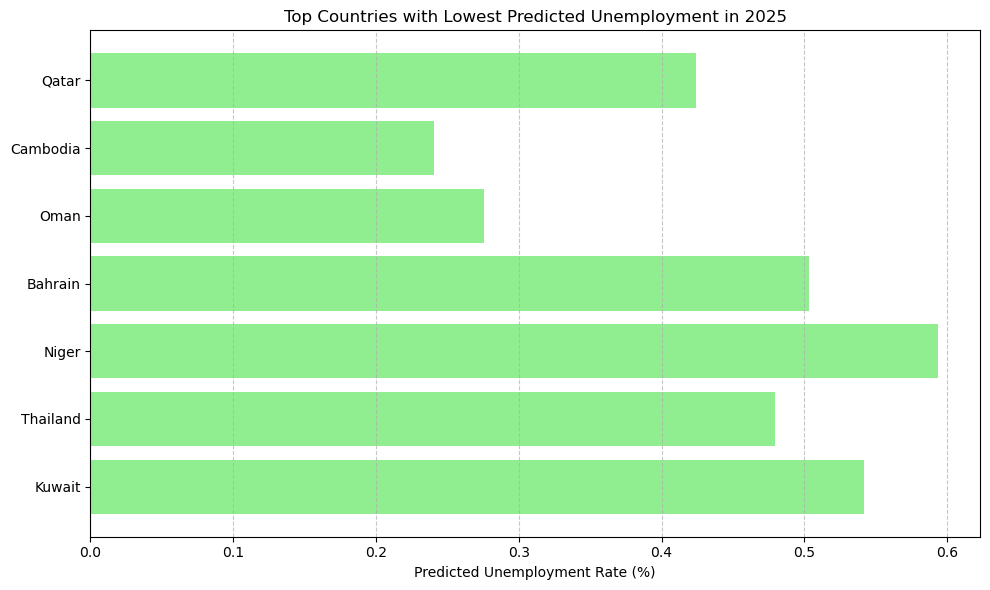

In [261]:
# Top Countries with Lowest Predicted Unemployment in 2025
lowest_predicted = data[['country_name', '2025_pred']].sort_values(by='2025_pred', ascending=True).head(20)

# طباعة النتائج
print("Top Countries with Lowest Predicted Unemployment in 2025:")
print(lowest_predicted)

plt.figure(figsize=(10, 6))
plt.barh(lowest_predicted['country_name'], lowest_predicted['2025_pred'], color='lightgreen')
plt.xlabel('Predicted Unemployment Rate (%)')
plt.title('Top Countries with Lowest Predicted Unemployment in 2025')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
